# `Applied Machine Learning`

## `Lab 1. Data domains and machine learning tasks`

In the lecture, we discussed that the most common machine learning tasks are classification and regression. But life, as usual, is richer than a book, and for each data domain there are many specific tasks that are solved by ML specialists with varied success.

In [1]:
!pip install torchaudio >> /dev/null

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams.update({'font.size': 18})
sns.set_style('whitegrid')

## Synthetic/Geometric data

- We know exactly all the dependencies between the target variable and the features, since we set them ourselves
- Good for visualizing how algorithms work

**Attention!** An example of good plot design.

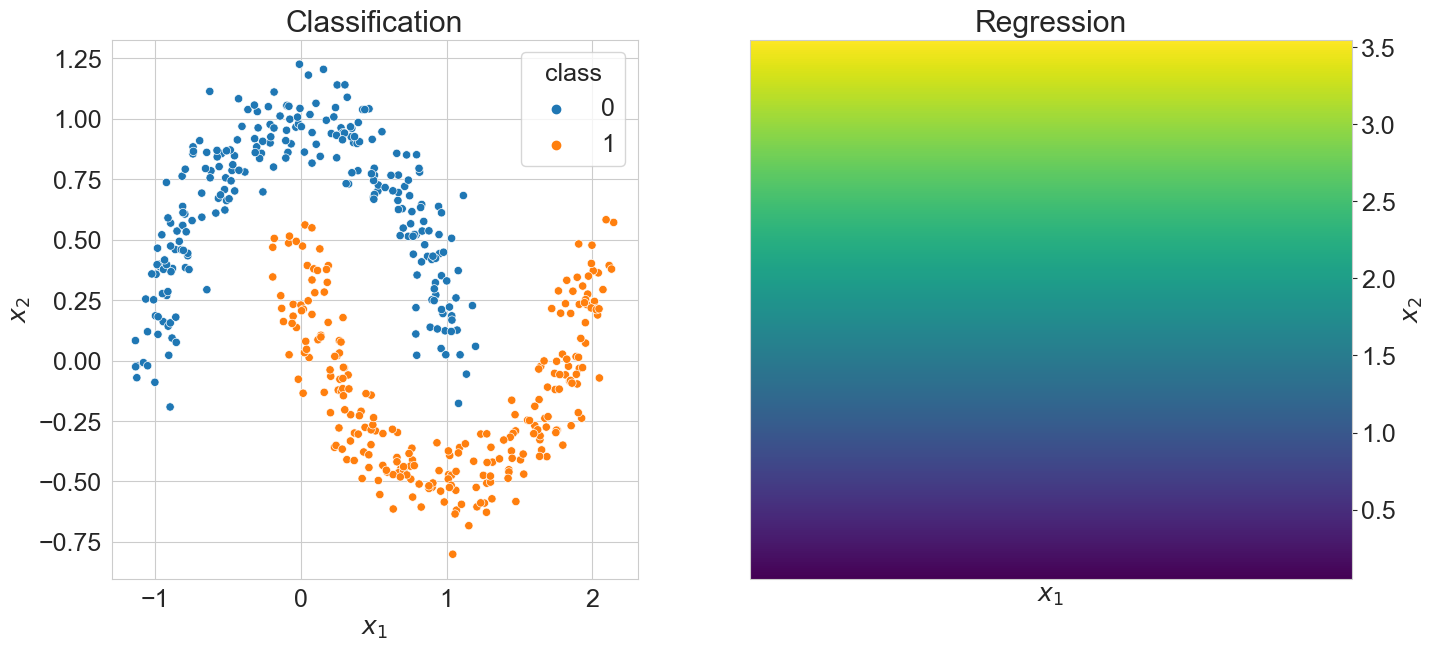

In [3]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.1, random_state=0)
fig, axs = plt.subplots(figsize=(16, 7), nrows=1, ncols=2, gridspec_kw={'width_ratios': [1.75, 2]})
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, ax=axs[0])

X = np.random.randn(500, 2)
y = np.sqrt((X ** 2).sum(axis=1))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, ax=axs[1], palette='viridis')

axs[0].legend(title='class')
axs[0].set_title('Classification')

norm = plt.Normalize(y.min(), y.max())
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])

ax=axs[1] ##had porblem with definition, so it's defined in here
axs[1].get_legend().remove()
axs[1].figure.colorbar(sm, ax, label='target') ##Added steal space for colorbar
axs[1].set_title('Regression')


for ax in axs:
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')

plt.show()

## Tabular data

Of course, we could take any data and present it as a table, but here we are talking about canonically tabular data, when all the features are of a different nature and, in a sense, are separate, "meaningful" dimensions.
- This is one of the most common data types
- Usually features are divided into numeric and categorical.

In [4]:
from sklearn.datasets import load_iris

X = load_iris()
X = pd.DataFrame(data=np.concatenate((X['data'], X['target'].reshape(-1, 1)), axis=1),
                 columns=list(X['feature_names']) + ['target'])
X

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0  
..      ...  
145     2.0  
146     2.0  
147     2.0  
148     2.0  
149     2.0  

[150 rows x 5 columns]

## Images

The branch of machine learning that deals with images is called computer vision (CV). Typically, images are represented as tensors (multidimensional arrays) of size $(H, W, C)$, where typically $C = 3$. The content of the tensor depends on the color space; RGB is most often used.

In [5]:
!wget -O image.jpg https://img.razrisyika.ru/kart/100/1200/396930-milyy-ezhik-5.jpg

--2024-03-20 00:37:16--  https://img.razrisyika.ru/kart/100/1200/396930-milyy-ezhik-5.jpg
Resolving img.razrisyika.ru (img.razrisyika.ru)... 5.189.239.45
Connecting to img.razrisyika.ru (img.razrisyika.ru)|5.189.239.45|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200739 (196K) [image/jpeg]
Saving to: ‘image.jpg’

image.jpg           100%[===================>] 196,03K  --.-KB/s    in 0,1s    

2024-03-20 00:37:17 (1,73 MB/s) - ‘image.jpg’ saved [200739/200739]



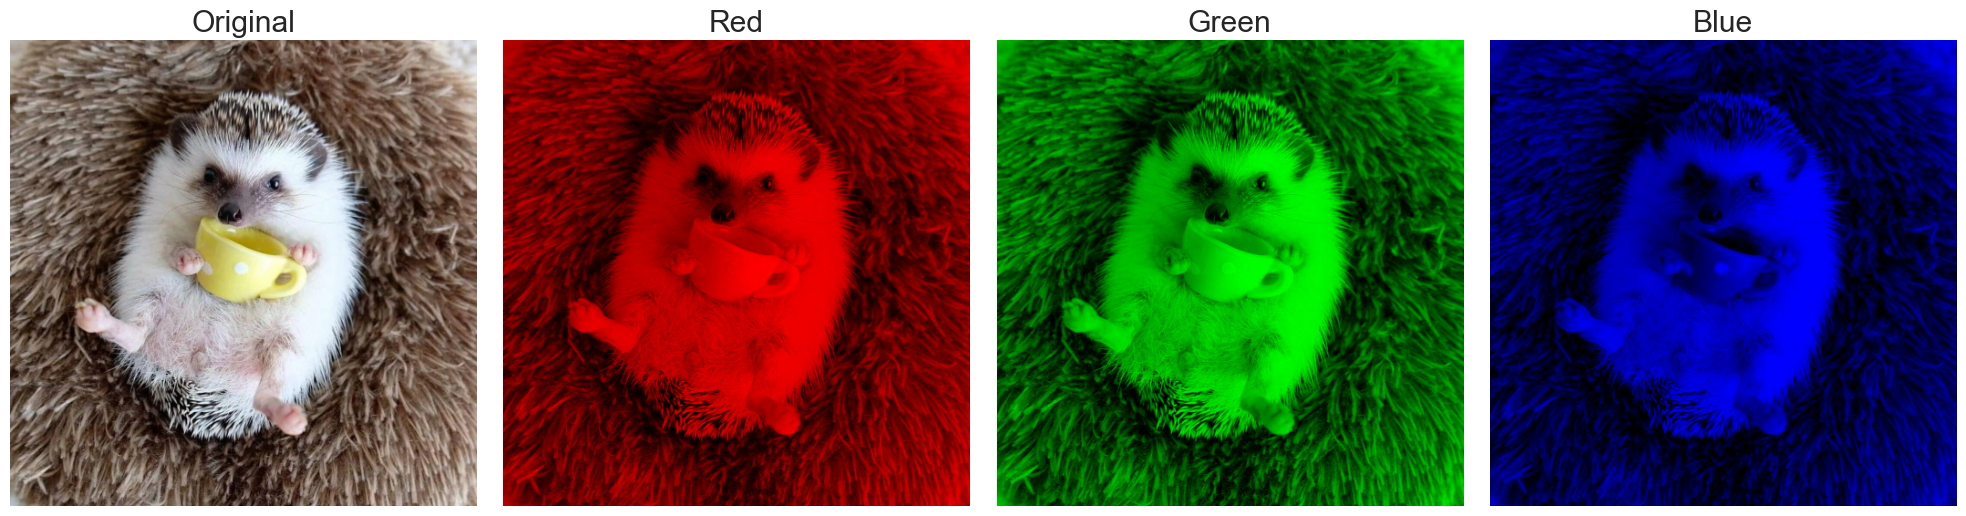

In [6]:
from skimage import io, color
from skimage.transform import resize

rgb_image = resize(io.imread('image.jpg'), (512, 512))
fix, axs = plt.subplots(figsize=(20, 6), nrows=1, ncols=4)
axs[0].imshow(rgb_image)

red_image = np.copy(rgb_image)
red_image[..., 1:] = 0.0
axs[1].imshow(red_image)

green_image = np.copy(rgb_image)
green_image[..., [0, 2]] = 0.0
axs[2].imshow(green_image)

blue_image = np.copy(rgb_image)
blue_image[..., :2] = 0.0
axs[3].imshow(blue_image)

for ax in axs:
    ax.grid(False)
    ax.axis('off')

for ax, title in zip(axs, ['Original', 'Red', 'Green', 'Blue']):
    ax.set_title(title)

plt.tight_layout()
plt.show()

Sometimes other color spaces are used, for example, Lab (a lightness channel and two color channels).

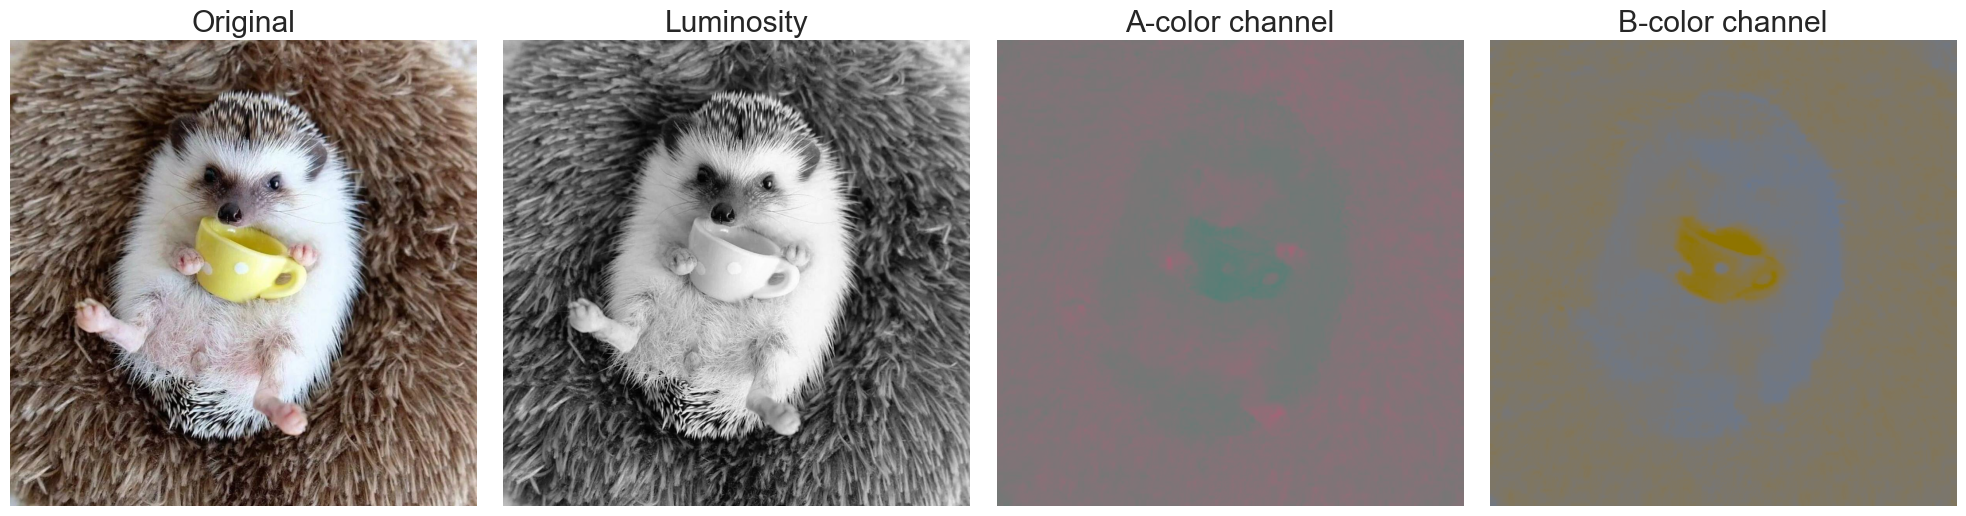

In [7]:
rgb_image = io.imread('image.jpg')

lab_image = color.rgb2lab(rgb_image)
fix, axs = plt.subplots(figsize=(20, 6), nrows=1, ncols=4)
axs[0].imshow(rgb_image)

l_image = np.copy(lab_image)
l_image[..., 1:] = 0.0
axs[1].imshow(color.lab2rgb(l_image))

a_image = np.copy(lab_image)
a_image[..., 0] = 50
a_image[..., 2] = 0
axs[2].imshow(color.lab2rgb(a_image))

b_image = np.copy(lab_image)
b_image[..., 0] = 50
b_image[..., 1] = 0
axs[3].imshow(color.lab2rgb(b_image))

for ax in axs:
    ax.grid(False)
    ax.axis('off')

for ax, title in zip(axs, ['Original', 'Luminosity', 'A-color channel', 'B-color channel']):
    ax.set_title(title)

plt.tight_layout()
plt.show()

### Tasks:

**Classification** (ImageNet, CIFAR-10/100, MNIST)


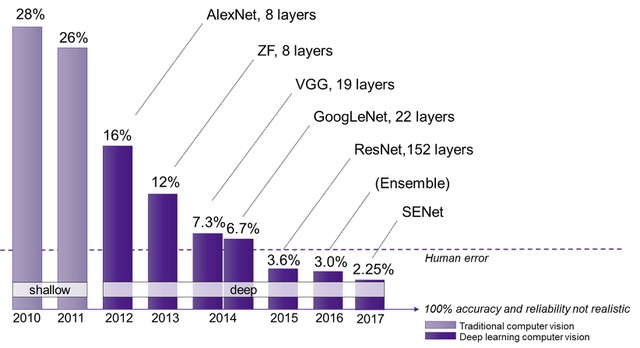

**Semantic segmentation** (PASCAL VOC, Cityscapes)


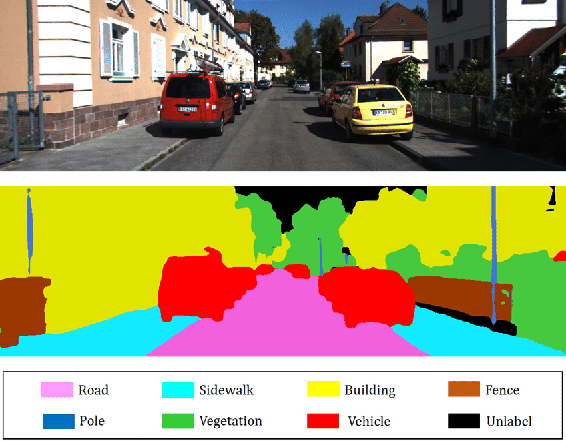

**Object detection** (COCO, PASCAL VOC)


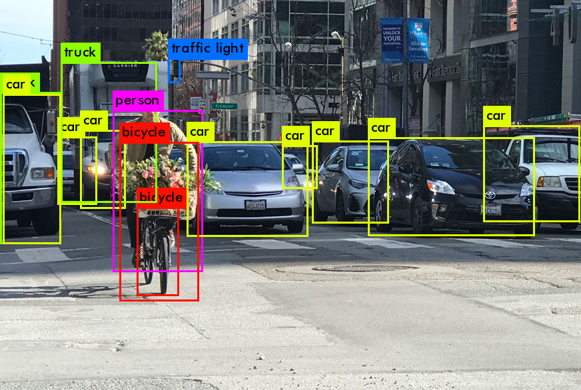

And many, many others, such as **pose estimation**, **scene reconstruction**, etc.

There are also various kinds of generative tasks, such as **style transfer** or **super-resolution**.


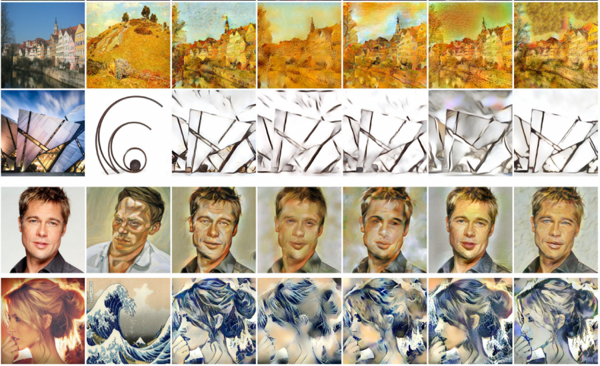

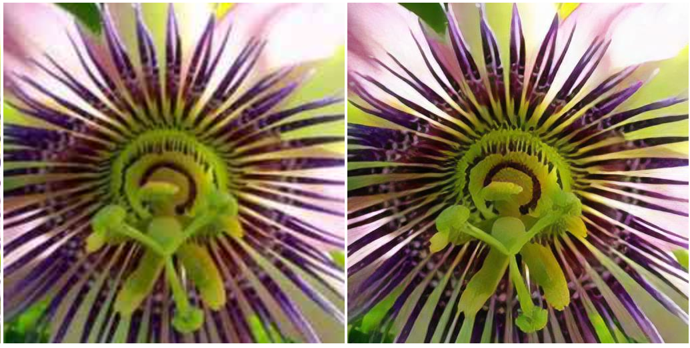

## Text data

Natural Language Processing (NLP) is one of the most popular areas in machine learning. Often, methods from NLP migrate to other data domains and find successful application there. The main features of texts are, firstly, their discreteness, and secondly, their sequential structure. As a rule, when working with text, it is tokenized (by characters, by words, or by combinations of characters - the so-called byte-pair-encoding, BPE), and then each token is assigned some embedding vector. This transformation allows discrete data to be processed by continuous models.

Recently, tools for working with data have also been developed that are similar to texts, but are indeed somewhat different. For example, new tasks and data appear related to the processing of program code.

## Tasks:

- **Machine translation** (WMT, IWSLT)
- **Text summarization** (GigaWord, arXiv)
- **Language modeling** (WikiText)
- **Text generation** (MATH, COCO Captions)
- **Question answering** (SQuAD, WikiQA)
- **Part-of-speech tagging (POS)** (Penn Treebank)
- **Sentiment analysis** (SST, IMDb)


## Audio

Audio recordings are often represented as a sequence of real numbers from the interval $[-1, 1]\,$ (wav format). Such audio can be either single-channel or multi-channel. When working with music, the MIDI format is popular. The most common audio representation is a spectrogram, which is the result of applying the Fourier transform or its variations to a sound wave.

In [9]:
import librosa
import torch
import torchaudio
from IPython.display import Audio

waveform, sample_rate = librosa.load(librosa.example('trumpet'))
waveform = torch.from_numpy(waveform)
Audio(waveform, rate=sample_rate)

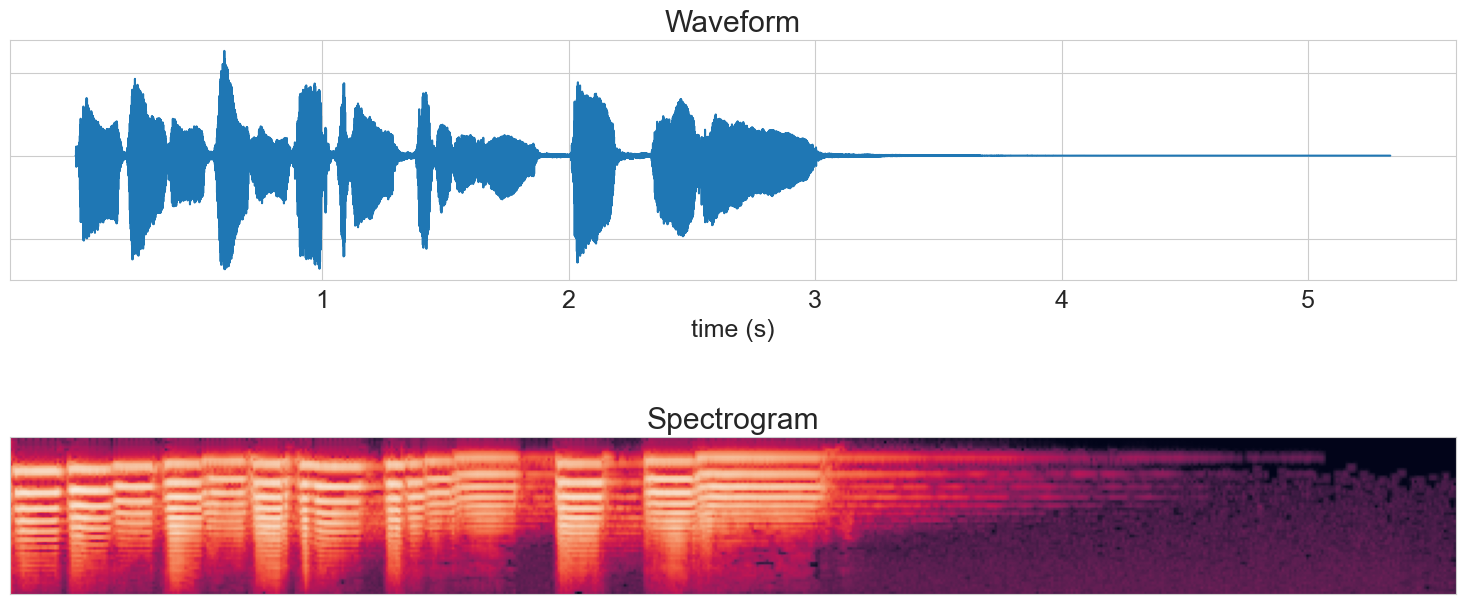

In [10]:
spectrogramer = torchaudio.transforms.MelSpectrogram(n_mels=64, sample_rate=sample_rate)
spec = spectrogramer(waveform.unsqueeze(0)).squeeze(0)

fig, axs = plt.subplots(figsize=(15, 8), nrows=2, ncols=1, gridspec_kw={'height_ratios': [1, 2]})
axs[0].plot(waveform)
axs[1].imshow(torch.log(spec + 1e-9))

pos = (np.arange(1, 6, 1) * sample_rate).astype(int)
axs[0].set_xticks(pos)
axs[0].xaxis.set_ticklabels([str(i) for i in range(1, 6)])
axs[0].yaxis.set_ticklabels([])
axs[0].set_xlabel('time (s)')
axs[0].set_title('Waveform')

axs[1].grid(False)
axs[1].xaxis.set_ticklabels([])
axs[1].yaxis.set_ticklabels([])
axs[1].set_title('Spectrogram')

plt.tight_layout()
plt.show()

### Tasks

- **Speech recognition (automatic speech recognition, asr, speech-to-text)** (LJSpeech, LibriSpeech)
- **Speech synthesis (text-to-speech, tts)**
- **Music generation**
- **Denoising, Speech enhancement**
- **Keyword spotting**

## Video

Working with video files is similar to working with images: time is added to 2 spatial dimensions and the dimension of color channels. Sometimes the audio track is also considered in the context of the video. In general, the same tasks are relevant for video as for images, adjusted for changes in the scene over time. Among the specific tasks we can mention **optical flow** (tracking the movement of pixels in frames) and **object tracking** (tracking moving objects).



In [12]:
from IPython.display import Image
Image(url='https://nanonets.com/blog/content/images/2019/04/sparse-vs-dense.gif')

## Graph data

Sometimes data has an explicit or implicit graph structure (for example, molecules as graphs of atoms or profiles on social networks), and ML models would benefit from this additional knowledge. Graph problems can be divided into two types:

1. Tasks at the vertex level (for example, determining a social role)
2. Graph-level problems (for example, classification of molecules)

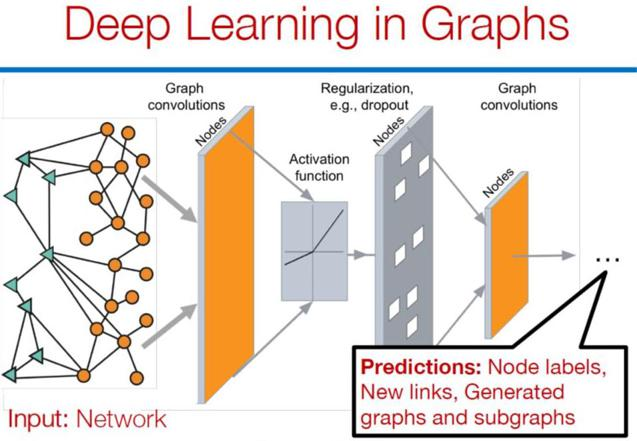

## Cross-domain tasks

Improvements in machine learning models and increased computing power have led to problems that span multiple data domains. Let us recall the problems of audio processing: speech recognition and synthesis are essentially translation from the audio domain to the text domain and vice versa. There are examples of combining text and images: this is Visual Question Answering (VQA) - answers to questions based on an image or text-to-image generation - generating an image based on a text query. Such problems are solved using very large and complex models, and also require a huge amount of data and computing budget. Here you can also remember about auto-vehicles, which also process data of a very different nature.